In [ ]:
# Install JDK
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [53.9 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:13 https://developer.download.nvi

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# Get Spark installer (check the path on spark.apache.org)
!wget -q http://apache.mirrors.pair.com/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz

In [ ]:
# Check path
!ls

drive  sample_data  spark-2.4.7-bin-hadoop2.7.tgz


In [ ]:
#Untar the Spark installer
!tar -xvf spark-2.4.7-bin-hadoop2.7.tgz

spark-2.4.7-bin-hadoop2.7/
spark-2.4.7-bin-hadoop2.7/kubernetes/
spark-2.4.7-bin-hadoop2.7/kubernetes/tests/
spark-2.4.7-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-2.4.7-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-2.4.7-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/entrypoint.sh
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/Dockerfile
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/Dockerfile
spark-2.4.7-bin-hadoop2.7/NOTICE
spark-2.4.7-bin-hadoop2.7/data/
spark-2.4.7-bin-hadoop2.7/data/strea

In [ ]:
# Install findspark - a python library to find Spark
!pip install -q findspark

In [ ]:
# Set environment variables
# Set Java and Spark home based on the location where they are stored
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

In [ ]:
# Create a local Spark session
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
# Import the package
import pyspark
from pyspark import SparkContext
from pyspark.sql import SQLContext
import pandas as pd
import numpy as np
import matplotlib as plt
import string
import re
import nltk

# Create SparkContextz
sc = SparkContext.getOrCreate()
print("SparkContext : ", sc)

# Define spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

SparkContext :  <SparkContext master=local[*] appName=pyspark-shell>


In [ ]:
# Mount with gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Set the directory
import os
os.chdir("/content/gdrive/My Drive/IDS561/IDS561Project/CodeData")
!ls

Data1.csv  Data.xlsx  MasterData1.xlsx	MasterData2.xlsx


In [ ]:
data = pd.read_excel("/content/gdrive/My Drive/IDS561/IDS561Project/CodeData/MasterData2.xlsx")
data['Date'] = pd.to_datetime(data['Date'])
data.head()

#data.count()


,id,Text,Country,Date
0,1386791055765469952,#influencers #celebrities #contentcreators #wo...,US,2021-04-20
1,1386789896115810048,One of the biggest reasons NOT to be a Cyberba...,US,2021-04-20
2,1386789197969769984,"Now over a year into working remotely, we’ve g...",US,2021-04-20
3,1386785660846149888,8 U.S. Cities and Towns That Will Pay You To M...,US,2021-04-20
4,1386785645192940032,#Employment is one of the things that you can’...,US,2021-04-20


In [ ]:
#creating spark dataframe

from pyspark.sql.types import StructType, StructField, DoubleType, StringType, DateType,TimestampType

schema = StructType([StructField("id", StringType(), True), StructField("Text", StringType(), True),StructField("Country", StringType(), True), StructField("Date", TimestampType(), True)])
sdf =   spark.createDataFrame(data, schema=schema)
sdf.show(10)

+-------------------+--------------------+-------+-------------------+
|                 id|                Text|Country|               Date|
+-------------------+--------------------+-------+-------------------+
|1386791055765469952|#influencers #cel...|     US|2021-04-20 00:00:00|
|1386789896115810048|One of the bigges...|     US|2021-04-20 00:00:00|
|1386789197969769984|Now over a year i...|     US|2021-04-20 00:00:00|
|1386785660846149888|8 U.S. Cities and...|     US|2021-04-20 00:00:00|
|1386785645192940032|#Employment is on...|     US|2021-04-20 00:00:00|
|1386785400518330112|Hubstaff organize...|     US|2021-04-20 00:00:00|
|1386784381344300032|Check this out FR...|     US|2021-04-20 00:00:00|
|1386783345078579968|Studies show that...|     US|2021-04-20 00:00:00|
|1386783031663500032|We’re hiring! We ...|     US|2021-04-20 00:00:00|
|1386782931885159936|We’re hiring! We ...|     US|2021-04-20 00:00:00|
+-------------------+--------------------+-------+-------------------+
only s

In [ ]:
#Cleaning the tweets

from pyspark.sql.functions import col, lower, regexp_replace, split


def clean_text(c):
  c = lower(c)
  c = regexp_replace(c, "#workfromhome", "")
  c = regexp_replace(c, "#work", "")
  c = regexp_replace(c, "#remote", "")
  c = regexp_replace(c, "#wfh", "")
  c = regexp_replace(c, "#working", "")
  c = regexp_replace(c, "#remotework", "")
  c = regexp_replace(c, "^rt ", "")
  c = regexp_replace(c, "(https\://)\S+", "")
  c = regexp_replace(c, "@([A-Za-z0-9_]+)", "") # Remove usernames
  c = regexp_replace(c, "#([A-Za-z0-9_]+)", "") # Remove Hashtags
  c = regexp_replace(c, "[^a-zA-Z0-9\\s]", "")
  c =  regexp_replace(c, "[\n]", " ")
# c =  regexp_replace(c, "workfromhome ", "")
 # c = split(c, "\\s+") #tokenization...
  return c



In [ ]:
#viewing the data 
clean_text_df = sdf.select( "id", clean_text(col("Text")).alias("tweet"), "Country", "Date")
clean_text_df.show(20, truncate=False)

clean_text_df.count()

+-------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+-------------------+
|id                 |tweet                                                                                                                                                                                                                                  |Country|Date               |
+-------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+-------------------+
|1386791055765469952|      check my website for my top recommended  sites                                                                                 

40645

In [ ]:
from pyspark.sql.functions import substring
clean_text_df = clean_text_df.withColumn('Date', substring('Date',1,10))
clean_text_df.show(20)

+-------------------+--------------------+-------+----------+
|                 id|               tweet|Country|      Date|
+-------------------+--------------------+-------+----------+
|1386791055765469952|      check my we...|     US|2021-04-20|
|1386789896115810048|one of the bigges...|     US|2021-04-20|
|1386789197969769984|now over a year i...|     US|2021-04-20|
|1386785660846149888|8 us cities and t...|     US|2021-04-20|
|1386785645192940032| is one of the th...|     US|2021-04-20|
|1386785400518330112|hubstaff organize...|     US|2021-04-20|
|1386784381344300032|check this out fr...|     US|2021-04-20|
|1386783345078579968|studies show that...|     US|2021-04-20|
|1386783031663500032|were hiring we ar...|     US|2021-04-20|
|1386782931885159936|were hiring we ar...|     US|2021-04-20|
|1386781945510739968|happy   and stay ...|     US|2021-04-20|
|1386780874549580032|  and  has change...|     US|2021-04-20|
|1386778176500740096|15 top ways to ma...|     US|2021-04-20|
|1386775

In [ ]:
#Removing Duplicates
clean_text_df1 = clean_text_df.drop_duplicates(subset = ['id','tweet','Date','Country'])
clean_text_df1.count()

25476

In [ ]:
# sample how textblob works

testimonial = TextBlob("not great")
testimonial.sentiment

Sentiment(polarity=-0.4, subjectivity=0.75)

In [ ]:
from textblob import TextBlob

#Textblob Algorithm
def get_sentiment(text):
  testimonial = TextBlob(text)
  return testimonial.sentiment   


In [ ]:
# Get sentiment from tweet
from pyspark.sql.functions import udf

sentimentvalue = udf(lambda x: TextBlob(x).sentiment[0])
subjectivity = udf(lambda x: TextBlob(x).sentiment[1])
sendf = clean_text_df1.withColumn("polarity", sentimentvalue("tweet").cast("double"))\
                      .withColumn("subjectivity",  subjectivity("tweet").cast("double"))
sendf.show(20)

+-------------------+--------------------+-------+----------+--------------------+-------------------+
|                 id|               tweet|Country|      Date|            polarity|       subjectivity|
+-------------------+--------------------+-------+----------+--------------------+-------------------+
|1386668393298789888|more than 50 of e...|     US|2021-04-20|               0.135|               0.38|
|1386528439117649920|with  second wave...|     US|2021-04-22| 0.24583333333333335|0.48750000000000004|
|1386764264778739968|book now for summ...|     US|2021-04-23|                 0.3|                0.2|
|1386647617115909888|check out heliax ...|     US|2021-04-23|                -0.1|                0.2|
|1386780000000000000|         i love you |     US|2021-04-23|                 0.5|                0.6|
|1387018016660066310|6 days until its ...|     US|2021-04-23|                 0.0|                0.0|
|1387435800539897860|employees working...|     US|2021-04-23| 0.200000000

In [ ]:
sendf.dtypes

[('id', 'string'),
 ('tweet', 'string'),
 ('Country', 'string'),
 ('Date', 'string'),
 ('polarity', 'double'),
 ('subjectivity', 'double')]

In [ ]:
#defining sentiment logic
def categorysentiment(x):
    if x < 0:
      sentiment = "negative"
    elif x == 0:
        sentiment = "neutral"
    else:
        sentiment = "positive"
    return sentiment

In [ ]:
sentiment_udf = udf(categorysentiment, StringType())
sendf1 = sendf.withColumn("sentiment", sentiment_udf("polarity"))

In [ ]:
sendf1.show(10)

+-------------------+--------------------+-------+----------+-------------------+-------------------+---------+
|                 id|               tweet|Country|      Date|           polarity|       subjectivity|sentiment|
+-------------------+--------------------+-------+----------+-------------------+-------------------+---------+
|1386668393298789888|more than 50 of e...|     US|2021-04-20|              0.135|               0.38| positive|
|1386528439117649920|with  second wave...|     US|2021-04-22|0.24583333333333335|0.48750000000000004| positive|
|1386764264778739968|book now for summ...|     US|2021-04-23|                0.3|                0.2| positive|
|1386647617115909888|check out heliax ...|     US|2021-04-23|               -0.1|                0.2| negative|
|1386780000000000000|         i love you |     US|2021-04-23|                0.5|                0.6| positive|
|1387018016660066310|6 days until its ...|     US|2021-04-23|                0.0|                0.0|  n

In [ ]:
neg10 = sendf1.filter(sendf1.polarity == -1)\
       .select('id','tweet')\
        .take(10)

In [ ]:
neg10

[Row(id='1385597877905330177', tweet='something tells me commute to office is getting closer no its not the traffic my morning coffee tasted like the horrible coffee you get in office byebye '),
 Row(id='1388957304989655057', tweet=' i support the hybrid approach but until the flsa is rewritten which has been needed for decades orgs will resist nonexempt employees wfh managers were terrible at managing nonexempt time compliantly when they were in person'),
 Row(id='1388252417871909888', tweet='in this day and age  what a horrible thing to say '),
 Row(id='1388263028097910016', tweet='he did sl so nasty in hs '),
 Row(id='1387537623783247877', tweet='the truth about working from home in 24 shocking charts   via  work  '),
 Row(id='1388229694881890048', tweet='this is horrific and i believe her'),
 Row(id='1388265523159300096', tweet='i swear people who act like postal workers are the worst people ever have never seen the customers they sometimes have to deal with'),
 Row(id='13855220433

In [ ]:
# Enable Arrow-based columnar data transfers
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")

# Convert the Spark DataFrame back to a Pandas DataFrame using Arrow
sendf2 = sendf1.select("*").toPandas()

#Loading results to csv
#sendf2.to_csv('/content/gdrive/My Drive/IDS561/IDS561Project/Results/Textblobfinal.csv', index = False, header=True)

In [ ]:
#Creating three dataframes containing positive, negative, neutral tweets from final results dataframe
# Will use these dataframes to generate words and how many times they are used in positive, negative, neutal tweets to create wordclouds

tweets_df_pos = pd.DataFrame(sendf2['tweet'][sendf2['sentiment']=='positive'])
tweets_df_neg = pd.DataFrame(sendf2['tweet'][sendf2['sentiment']=='negative'])
tweets_df_neu = pd.DataFrame(sendf2['tweet'][sendf2['sentiment']=='neutral'])

In [ ]:
#Importing packages for reports

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import string
%matplotlib inline

+---------+-----+
|sentiment|count|
+---------+-----+
| positive|13649|
|  neutral| 7492|
| negative| 4335|
+---------+-----+



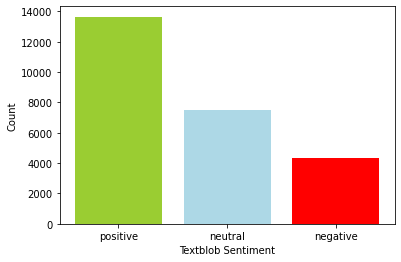

In [ ]:
# Distribution of sentiment of the tweets 

df_plot = sendf1.groupBy("sentiment").count()
df_plot.show(5)

x = df_plot.toPandas()["sentiment"].values.tolist()
y = df_plot.toPandas()["count"].values.tolist()

plt.bar(x,y, color =['yellowgreen', 'lightblue', 'red'])
plt.xlabel("Textblob Sentiment")
plt.ylabel("Count")
plt.show()

In [ ]:
#To create wordcloud with high frequency words in the tweets

def wordcloudreport(dfx, title):
  wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=100, background_color='white',)
  wordcloud.generate(str(set(dfx['tweet'])))
  # declare our figure 
  plt.figure(figsize=(20,10))
  plt.title(title, fontsize=20,color='Red')
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.tight_layout(pad=10)
  plt.show()

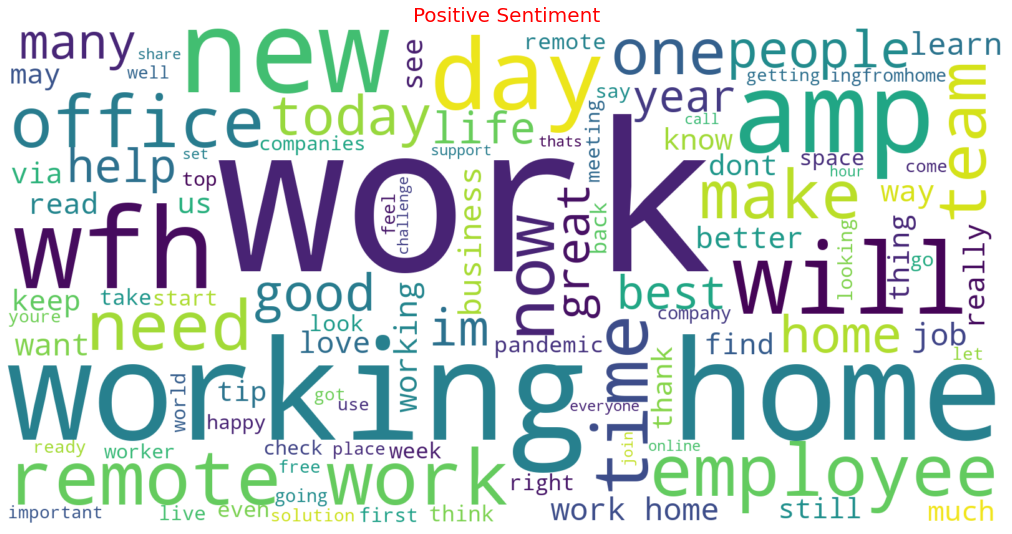

In [ ]:
#2
wordcloudreport(tweets_df_pos, "Positive Sentiment")

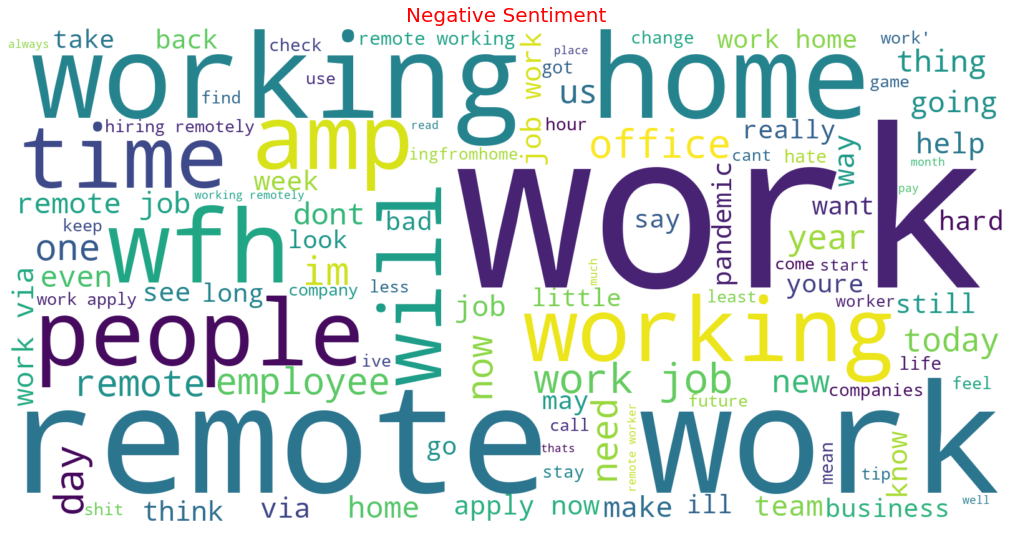

In [ ]:
wordcloudreport(tweets_df_neg, "Negative Sentiment")

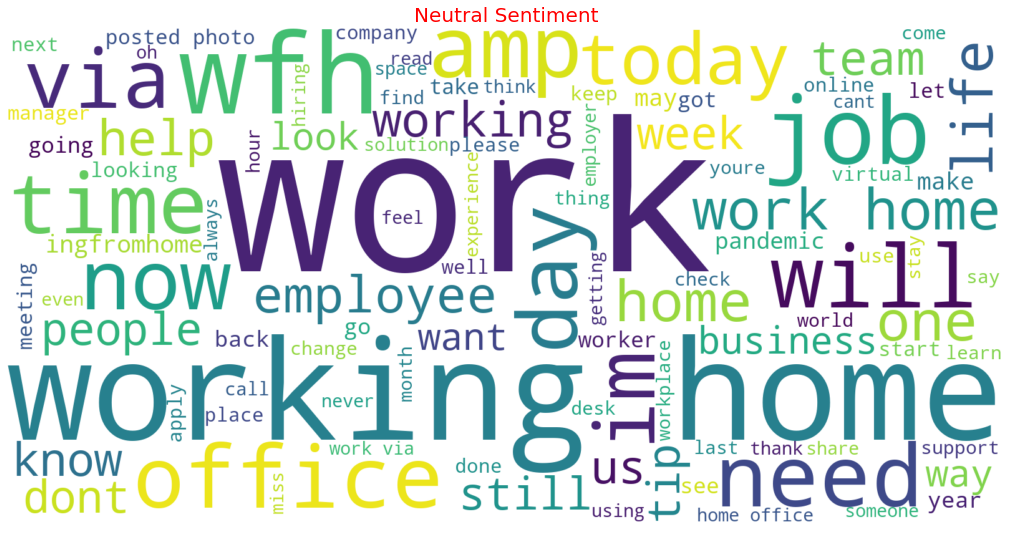

In [ ]:
wordcloudreport(tweets_df_neu, "Neutral Sentiment")

In [ ]:
#Algorithm Vader
#import vaderSentiment
#https://github.com/sanjames/NLP/blob/master/Social%20Media%20Analysis.ipynb
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

     |████████████████████████████████| 133kB 5.6MB/s 


In [ ]:
#Vader Algorithm
def print_sentiment_scores(tweets):
    vadersenti = analyser.polarity_scores(tweets)
    return pd.Series([vadersenti['pos'], vadersenti['neg'], vadersenti['neu'], vadersenti['compound']])

In [ ]:
#Calling the algorithm

sendf2[['vadersenti_pos', 'vadersenti_neg', 'vadersenti_neu', 'vadersenti_compound']]  = sendf2['tweet'].apply(print_sentiment_scores)

In [ ]:
sendf2[['tweet', 'sentiment', 'vadersenti_pos','vadersenti_neg', 'vadersenti_neu','vadersenti_compound']].head(10)

,tweet,sentiment,vadersenti_pos,vadersenti_neg,vadersenti_neu,vadersenti_compound
0,more than 50 of executives expect to start off...,positive,0.138,0.052,0.810,0.5574
1,with second wave amp becoming quite the norm...,positive,0.096,0.000,0.904,0.5106
2,book now for summer 2 hours from la lake vie...,positive,0.136,0.000,0.864,0.5106
3,check out heliax theyre looking for a remote ...,negative,0.086,0.000,0.914,0.1779
4,i love you,positive,0.677,0.000,0.323,0.6369
5,6 days until its here boutique parties awaits...,neutral,0.235,0.000,0.765,0.4588
6,employees working remotely must be paid provid...,positive,0.000,0.000,1.000,0.0000
7,time for the morning pay attention to me head ...,neutral,0.000,0.072,0.928,-0.1027
8,at acism we serve a buffet of options and all...,neutral,0.083,0.000,0.917,0.2263
9,does not mean we stop doing things with fri...,positive,0.420,0.000,0.580,0.8907


In [ ]:
sendf2[['tweet', 'vadersenti_pos','vadersenti_neg', 'vadersenti_neu','vadersenti_compound', 'vader_senti']].head(10)

,tweet,vadersenti_pos,vadersenti_neg,vadersenti_neu,vadersenti_compound,vader_senti
0,more than 50 of executives expect to start off...,0.138,0.052,0.810,0.5574,positive
1,with second wave amp becoming quite the norm...,0.096,0.000,0.904,0.5106,positive
2,book now for summer 2 hours from la lake vie...,0.136,0.000,0.864,0.5106,positive
3,check out heliax theyre looking for a remote ...,0.086,0.000,0.914,0.1779,positive
4,i love you,0.677,0.000,0.323,0.6369,positive
5,6 days until its here boutique parties awaits...,0.235,0.000,0.765,0.4588,positive
6,employees working remotely must be paid provid...,0.000,0.000,1.000,0.0000,neutral
7,time for the morning pay attention to me head ...,0.000,0.072,0.928,-0.1027,negative
8,at acism we serve a buffet of options and all...,0.083,0.000,0.917,0.2263,positive
9,does not mean we stop doing things with fri...,0.420,0.000,0.580,0.8907,positive


In [ ]:
#defining sentiment logic

sendf2.loc[sendf2['vadersenti_compound'] > 0.05 , 'vader_senti'] = 'positive'
sendf2.loc[sendf2['vadersenti_compound'] < -0.05 , 'vader_senti'] = 'negative'
sendf2.loc[(sendf2['vadersenti_compound'] <=0.05) & (sendf2['vadersenti_compound'] >=-0.05) , 'vader_senti'] = 'neutral'


Text(0, 0.5, 'Count')

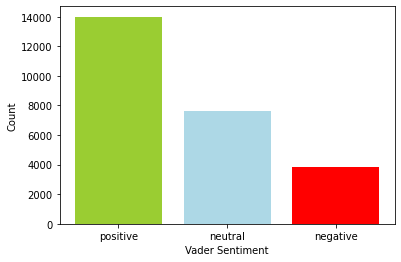

In [ ]:
# Distribution of sentiment of the tweets 

counts = sendf2.vader_senti.value_counts(normalize=False) 

x=counts.index
y=counts

plt.bar(x, y, color =['yellowgreen', 'lightblue', 'red'])
plt.xlabel("Vader Sentiment")
plt.ylabel("Count")


In [ ]:
#Count of Positive, negative, neutral tweets
print(sendf2.vader_senti.value_counts())

positive    14001
neutral      7637
negative     3838
Name: vader_senti, dtype: int64


In [ ]:
#Creating three dataframes containing positive, negative, neutral tweets from final results dataframe
# Will use these dataframes to generate words and how many times they are used in positive, negative, neutal tweets to create wordclouds

vader_df_pos = pd.DataFrame(sendf2['tweet'][sendf2['vader_senti']=='positive'])
vader_df_neg = pd.DataFrame(sendf2['tweet'][sendf2['vader_senti']=='negative'])
vader_df_neu = pd.DataFrame(sendf2['tweet'][sendf2['vader_senti']=='neutral'])

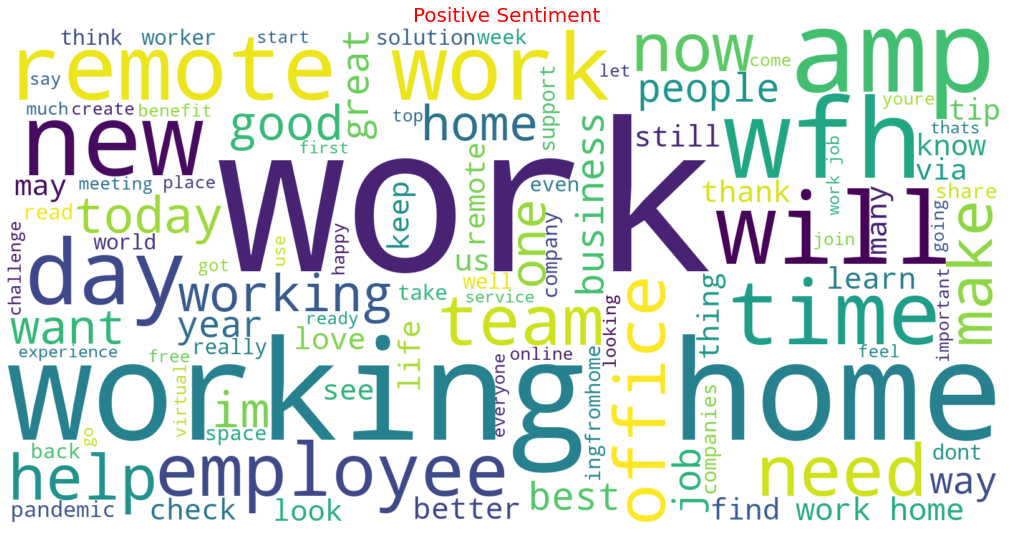

In [ ]:
wordcloudreport(vader_df_pos, "Positive Sentiment")

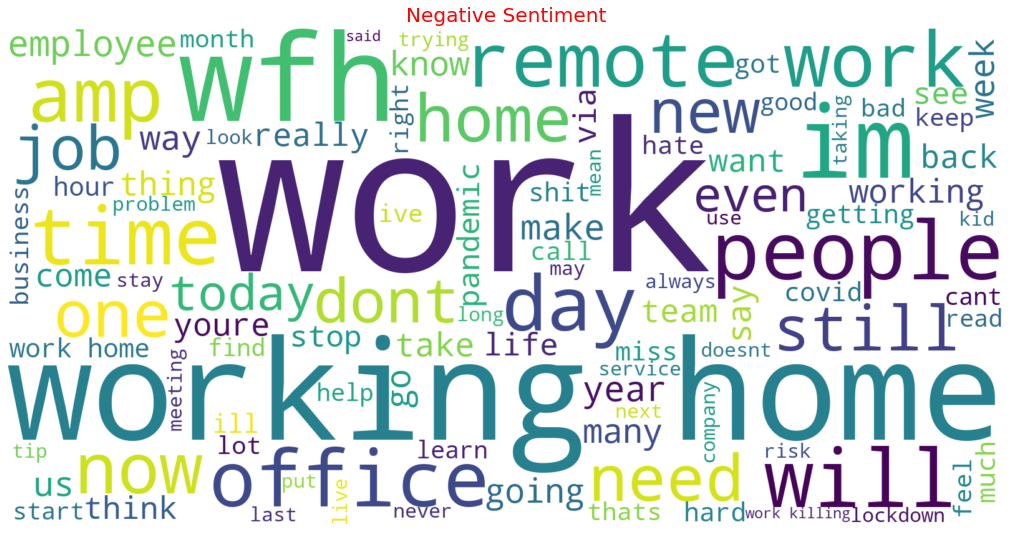

In [ ]:
wordcloudreport(vader_df_neg, "Negative Sentiment")

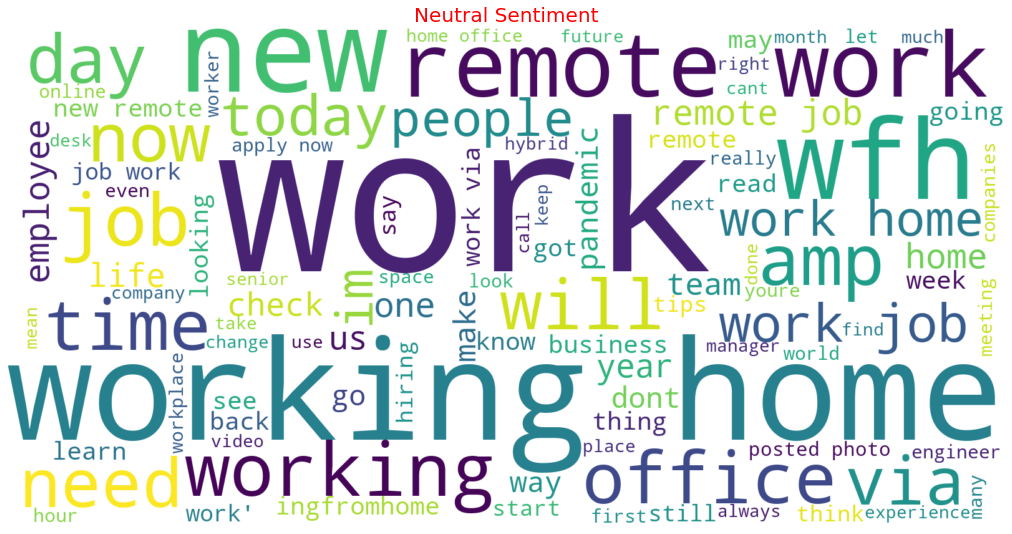

In [ ]:
wordcloudreport(vader_df_neu, "Neutral Sentiment")

In [ ]:
print("Positive Tweets:\n")
print(list(sendf2[sendf2['vader_senti'] == 'positive'].tweet)[:5])

print("\nNegative Tweets:\n")
print(list(sendf2[sendf2['vader_senti'] == 'negative'].tweet)[:5])

print("\nNeutral Tweets:\n")
print(list(sendf2[sendf2['vader_senti'] == 'neutral'].tweet)[:5])

Positive Tweets:

['more than 50 of executives expect to start offering remote working opportunities employees in the office will need to interface with remote team members look no further than tristate furniture to get your conference room tech friendly    ', 'with  second wave amp  becoming quite the norm than the exception everyone wants to beautify their  spaces with   vintage paperweights teakwood stapler gold plated ruler fancy mousepads pen stands in artistic designs ', 'book now for summer 2 hours from la   lake view house for california outdoor fun amp work  sequoias river rafting lake isabella              ', 'check out heliax  theyre looking for a remote remote senior rust engineer and offering a competitive salary  work jobs    ', ' i love you ']

Negative Tweets:

['time for the morning pay attention to me head butts  and im not even in a webex meeting  118365           ', 'work on an empty stomach is a quick way to be over the day    ', 'excited to drop a few  combos  its

In [ ]:
#Converting results into csv file to load into tableau
#sendf2.to_csv('/content/gdrive/My Drive/IDS561/IDS561Project/Results/Vaderfinal.csv', index = False, header=True)